In [1]:
import numpy as np 
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
#from pyspark import SparkContext    #No need for this code 
from time import time
from random import randint

# in the final code did not use Spark Context 
#sc = SparkContext.getOrCreate()


#Loading the data file.
train_df = pd.read_csv("/Users/nabeel/Desktop/Peer to Peer & Social Networks/Project/uiowaCrawler.csv")

print("Execution of this block completed")

Execution of this block completed


In [4]:
lengthOfUrl = len(train_df['URL'])
lengthOfUrlUnique = len(train_df['URL'].unique())
print("Length of URL is ",lengthOfUrl)
print("Length of Unique URL is ",lengthOfUrlUnique)

print("Execution of this block completed")

('Length of URL is ', 31605793)
('Length of Unique URL is ', 746229)
Execution of this block completed


In [4]:
#train_df.head()

In [5]:
lengthOfLinks = len(train_df['links'])
lengthOfLinksUnique = len(train_df['links'].unique())
print("Length of links are ",lengthOfLinks)
print("Length of Unique Links are ",lengthOfLinksUnique)

print("Execution of this block completed")

('Length of links are ', 31605793)
('Length of Unique Links are ', 1287331)
Execution of this block completed


In [7]:
randomNumber = []
count = 0
for i in range(100000):
    randomNumber.append(i)


In [25]:
UrlColumn = []
UrlColumn = train_df['URL']
#UrlColumn = UrlColumn[:10000]
UrlColumnRandom = []

for i in range(10000):
    UrlColumnRandom.append(UrlColumn[randomNumber[i]])

print("Execution of this block completed")

Execution of this block completed


In [26]:
LinksColumn = []
LinksColumn = train_df['links']
#LinksColumn = LinksColumn[:10000]
LinksColumnRandom = []

for i in range(10000):
    LinksColumnRandom.append(LinksColumn[randomNumber[i]])

print("Execution of this block completed")

Execution of this block completed


In [10]:
#print("Urls are ",UrlColumnRandom)

In [11]:
# Code for initializing Spark RDD
#UrlColumnSparkDataFrame = sc.parallelize(UrlColumnRandom)
#LinkColumnSparkDataFrame = sc.parallelize(LinksColumnRandom)

print("Execution of this block completed")

Execution of this block completed


In [12]:
# counting nodes using PySpark
#print("the length of the UrlColumn is",UrlColumnSparkDataFrame.count())

('the length of the UrlColumn is', 50000)


In [27]:
# calculating length using python 
print("the length of the UrlColumn is",len(UrlColumnRandom))
print("the length of the LinksColumn is",len(LinksColumnRandom))

('the length of the UrlColumn is', 10000)
('the length of the LinksColumn is', 10000)


In [12]:
#linksCountNotContainingUiowa = LinkColumnSparkDataFrame.filter(lambda x: 'uiowa.edu' not in x)
#t0 = time()
#LinksCountRandomNotContainingUiowaCount = linksCountNotContainingUiowa.count()
#tt = time() - t0

#print "There are {} 'uiowa.edu' pages".format(LinksCountRandomNotContainingUiowaCount)
#print "Count completed in {} seconds".format(round(tt,3))
#print("linksCountNotContainingUiowa is",linksCountNotContainingUiowa.count())

print("Execution of this block completed")

Execution of this block completed


In [28]:
x2 = []

for i in UrlColumnRandom:
    if 'uiowa.edu' not in i:
        x2.append(i)
x3 = []

t0 = time()
for i in LinksColumnRandom:
    if 'uiowa.edu' not in i:
        x3.append(i)
tt = time() - t0
        
print "Count completed in {} seconds".format(round(tt,3))
print("Length of UrlColumnUpdated not containing uiowa.edu are ",len(x2))
print("Length of LinksColumnUpdated not containing uiowa.edu are ",len(x3))

print("Execution of this block completed")

Count completed in 0.004 seconds
('Length of UrlColumnUpdated not containing uiowa.edu are ', 0)
('Length of LinksColumnUpdated not containing uiowa.edu are ', 771)
Execution of this block completed


In [29]:
# Finding rows which does not contain Uiowa.edu domain and adding them in a List rowsToBeDeleted 
rowsToBeDeleted = []
def findExtraRows():
    for i in range(10000):
        if ('uiowa.edu' not in LinksColumnRandom[i]) or ('uiowa.edu' not in UrlColumnRandom[i]):
            rowsToBeDeleted.append(i)
findExtraRows()
print("Execution of this block completed")

Execution of this block completed


In [30]:
# Displaying the number of rows to be deleted
print("The length of rows that are to be deleted ",len(rowsToBeDeleted))
#print("The rows to be deleted are ",rowsToBeDeleted)
print("Execution of this block completed")

('The length of rows that are to be deleted ', 771)
Execution of this block completed


In [20]:
#print("Urls are ",UrlColumnRandom)
#print("LinksColumn are ",LinksColumnRandom)
#print("ROws to be deleted are ",rowsToBeDeleted)

In [31]:
# Deleting the rows that does not contain 'uiowa.edu' 
temp1 = list(UrlColumnRandom)
temp2 = list(LinksColumnRandom)
for i in rowsToBeDeleted:
    #print(i)
    temp1.remove(UrlColumnRandom[i])
    temp2.remove(LinksColumnRandom[i])
    
print("Execution of this block completed")

Execution of this block completed


In [32]:
print("Length of UrlColumn random is",len(UrlColumnRandom))
print("Length of LinksColumn random is",len(LinksColumnRandom))
print("Length of temp1 is",len(temp1))
print("Length of temp2 is",len(temp2))

UrlColumnRandom = list(temp1)
LinksColumnRandom = list(temp2)

print("Length of UrlColumn random is",len(UrlColumnRandom))
print("Length of LinksColumn random is",len(LinksColumnRandom))
print("Length of temp1 is",len(temp1))
print("Length of temp2 is",len(temp2))

('Length of UrlColumn random is', 10000)
('Length of LinksColumn random is', 10000)
('Length of temp1 is', 9229)
('Length of temp2 is', 9229)
('Length of UrlColumn random is', 9229)
('Length of LinksColumn random is', 9229)
('Length of temp1 is', 9229)
('Length of temp2 is', 9229)


In [33]:
# Converting List into DataFrame
uiowaDataFrame = pd.DataFrame(
    {'Url': UrlColumnRandom,
     'Link': LinksColumnRandom
    })

print("Execution of this block completed")

Execution of this block completed


In [13]:
# Converting data frame into CSV File 

uiowaDataFrame.to_csv('/Users/nabeel/Desktop/Peer to Peer & Social Networks/Project/uiowaReducedDataSet3.csv', sep=',', index=False)

print("Execution of this block completed")

Execution of this block completed


In [34]:
print("Length of UrlColumn & LinksColumn after deletion is ",len(UrlColumnRandom),len(LinksColumnRandom))
print("Execution of this block completed")

('Length of UrlColumn & LinksColumn after deletion is ', 9229, 9229)
Execution of this block completed


In [180]:
#Resetting index after deletion

#UrlColumn = UrlColumn.reset_index(drop=True)
#LinksColumn = LinksColumn.reset_index(drop=True)

#print("Th new UrlColumnUpdated is ",UrlColumn)
#print("The new LinksColumnUpdtaed is ",LinksColumn)

In [35]:
# Finding the length of the new UrlColumn and LinksColumn
lengthOfUrlAfterEditing = len(UrlColumnRandom)
lengthOfLinksAfterEditing = len(LinksColumnRandom)

print("Length of the UrlColumn after Editing is ",lengthOfUrlAfterEditing)
print("Length of the LinksColumn after Editing is ",lengthOfLinksAfterEditing)

print("Execution of this block completed")

('Length of the UrlColumn after Editing is ', 9229)
('Length of the LinksColumn after Editing is ', 9229)
Execution of this block completed


In [37]:
# Mapping URL's to number in a Dictionary
UrlToNumberMapping = {}
count = 0
#print("UrlColumn and LinksColumn are",UrlColumn[1000])
for i in range(9229):
    #print("UrlColumn and LinksColumn are ",UrlColumn[i],LinksColumn[i],i)
    if LinksColumnRandom[i] not in UrlToNumberMapping:
        UrlToNumberMapping[LinksColumnRandom[i]] = count 
        count += 1
    if UrlColumnRandom[i] not in UrlToNumberMapping:
        UrlToNumberMapping[UrlColumnRandom[i]] = count
        count += 1
#print("UrlToNumberMapping Dictionary Value is ",UrlToNumberMapping)

print("The number of element in dictionary is ",count)
print("Execution of this block completed")

('The number of element in dictionary is ', 4666)
Execution of this block completed


In [38]:
# Printing the number of nodes 
print("The number of nodes are ",len(UrlToNumberMapping.keys()))

print("Execution of this block completed")

('The number of nodes are ', 4666)
Execution of this block completed


In [41]:
# Creating Graph 
G = nx.Graph()
nodeAdded = {}
for i in range(9229):
    #print("URL ",UrlColumn[i])
    #print("LinksColumn",LinksColumn[i])
    if UrlColumnRandom[i] not in nodeAdded:
        G.add_node(UrlColumnRandom[i])
        nodeAdded[UrlColumnRandom[i]] = "yes"
    if LinksColumnRandom[i] not in nodeAdded:
        G.add_node(LinksColumnRandom[i])
        nodeAdded[LinksColumnRandom[i]] = "yes"
for i in range(9229):
    G.add_edge(UrlColumnRandom[i],LinksColumnRandom[i])

print("Execution of this block completed")

Execution of this block completed


In [42]:
isConnected = nx.is_connected(G)
print("The graph is connected ",isConnected)

numberOfConnectedComponents = nx.number_connected_components(G)
print("The number of Connected components are ",numberOfConnectedComponents)

graphs = list(nx.connected_component_subgraphs(G))

print("The info about graph is ",nx.number_connected_components(graphs[0]),nx.is_connected(graphs[0]))
print("The number of nodes in the graph are ", nx.number_of_nodes(graphs[0]))
print("The number of nodes in the graph are ", nx.number_of_nodes(graphs[1]))



('The graph is connected ', False)
('The number of Connected components are ', 2)
('The info about graph is ', 1, True)
('The number of nodes in the graph are ', 4663)
('The number of nodes in the graph are ', 3)


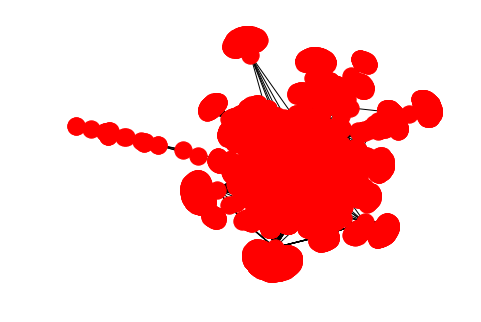

('NetworkX Calculated Diameter of the Graph is ', 10)
Name: 
Type: Graph
Number of nodes: 4663
Number of edges: 8797
Average degree:   3.7731


ValueError: x and y must have same first dimension, but have shapes (10000,) and (672,)

In [43]:
# Plotting a Graph
nx.draw(graphs[0]) #Setting the parameters for the Graph
plt.show() # Plotting the Graph

diameterForGraph0 = nx.diameter(graphs[0])
print("NetworkX Calculated Diameter of the Graph is ",diameterForGraph0)
print(nx.info(graphs[0]))

degreeD = nx.degree_histogram(G)
#print("NetworkX Calculated Degree Distribution is ", degreeD)


In [ ]:
# Plotting a Graph
nx.draw(G)	#Settign the parameters for the Graph
plt.show()	# Plotting the Graph

print("Execution of this block completed")

In [1]:
#This is suppose to be computationally very expensive so no need to run this code 
# Displaying Diameter & Other Information about the Graph using the InBuilt Function.
#diameterForERGraph = nx.diameter(G)
#print("NetworkX Calculated Diameter of the Graph is ",diameterForERGraph)
#print(nx.info(G))


#Calculating the Degree Distribution using the NetworkX function
#degreeD = nx.degree_histogram(G)
#print("NetworkX Calculated Degree Distribution is ", degreeD)

In [53]:
z = {}
count = 0
for i in train_df['URL'].unique():
    if i not in z:
        z[i] = count
        count += 1
    
for i in train_df['links'].unique():
    if i not in z:
        z[i] = count
        count += 1
print(len(z))

1463309


In [55]:
z = list(z)
print(len(z))

1463309


In [2]:
#FilteredData.head()
G_1 = nx.from_pandas_dataframe(train_df, 'URL', 'links')

# Finding the number of connected components 
#print(nx.is_connected(G_1))
#print(nx.number_connected_components(G_1))

#for i in range(41):
#    print("__3__")
#    temp = nx.number_of_nodes(subgraphs[i])
#    print("the numner of node is ",i,temp)

print("end")

end


In [63]:
# finding the shortest path between the randomly selected nodes 
import random
r = []
for i in range(5):
    x_random = random.choice(z)
    #print(x_random)
    y_random = random.choice(z)
#print(y_random)
    l = nx.shortest_path_length(G_1,source = x_random,target = y_random)
    #print(l)
    r.append(l)

In [64]:
print(r)

[5, 5, 4, 2, 2]


In [4]:
d={}
for i in G_1:
    d[i]=G_1.degree(i)
    


In [5]:
a= list(d.values())

In [6]:
degree_distribution = {}
for i in a:
    if i in degree_distribution.keys():
        degree_distribution[i]+=1
    else:
        degree_distribution[i]=1

Populating the interactive namespace from numpy and matplotlib


/Users/nabeel/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt', 'randint']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


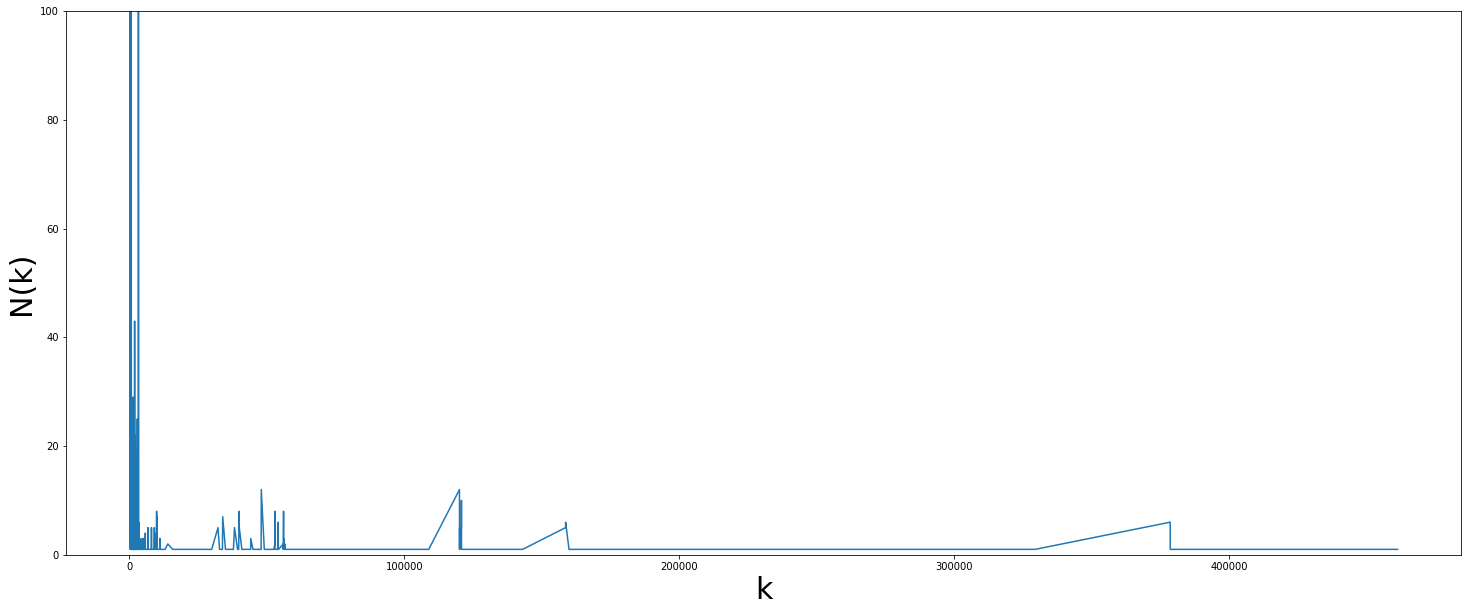

In [7]:
import matplotlib.pylab as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (25, 10)
lists = sorted(degree_distribution.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.ylim(0, 100)
#plt.xlim(0, 10)
pylab.ylabel('N(k)', fontsize=30)
pylab.xlabel('k', fontsize=30)


plt.plot(x, y)
y_df = train_df['links']
ind = {} #dictionary with indegree for all the nodes 
for i in y_df:
    if i in ind.keys():
        ind[i]+=1
    else:
        ind[i]=1plt.show()

In [4]:
y_df = train_df['links']

In [6]:

ind = {} #dictionary with indegree for all the nodes 
for i in y_df:
    if i in ind:
        ind[i]+=1
    else:
        ind[i]=1
        
print("end")

end


In [7]:
x_df = train_df['URL'] #dictionary with outdegree of all nodes 
od={}
for i in x_df:
    if i in od:
        od[i]+=1
    else:
        od[i]=1
    
print("end")

end


In [8]:
out_degree=list(od.values())
in_degree =list(ind.values())

print("end")

end


In [9]:
indegree_distribution = {}
for i in in_degree:
    if i in indegree_distribution.keys():
        indegree_distribution[i]+=1
    else:
        indegree_distribution[i]=1
        
print("end")

end


Populating the interactive namespace from numpy and matplotlib


/Users/nabeel/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt', 'randint']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


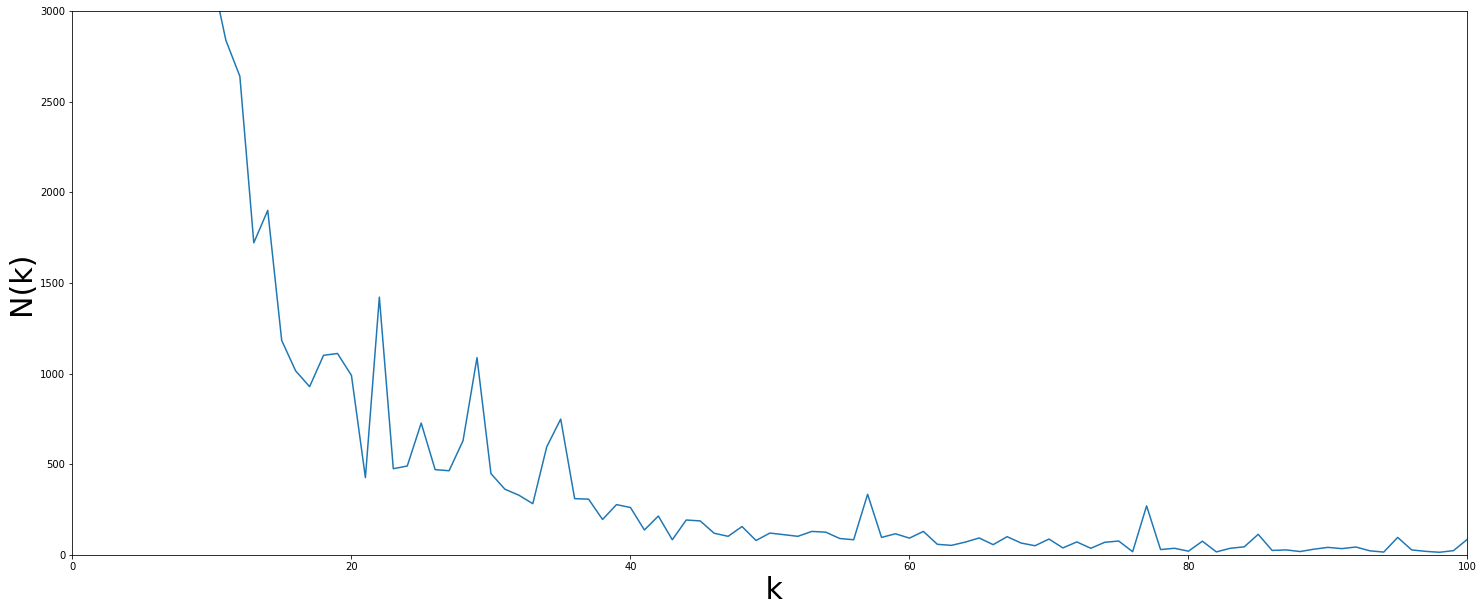

In [10]:
import matplotlib.pylab as plt
lists_in = sorted(indegree_distribution.items()) # sorted by key, return a list of tuples
%pylab inline
pylab.rcParams['figure.figsize'] = (25, 10)
plt.ylim(0, 3000)
plt.xlim(0, 100)
pylab.ylabel('N(k)', fontsize=30)
pylab.xlabel(' k', fontsize=30)

x_in, y_in = zip(*lists_in) # unpack a list of pairs into two tuples
plt.plot(x_in, y_in)
plt.show()

In [14]:
outdegree_distribution = {}
for i in out_degree:
    if i in outdegree_distribution.keys():
        outdegree_distribution[i]+=1
    else:
        outdegree_distribution[i]=1
        
len(outdegree_distribution)

475

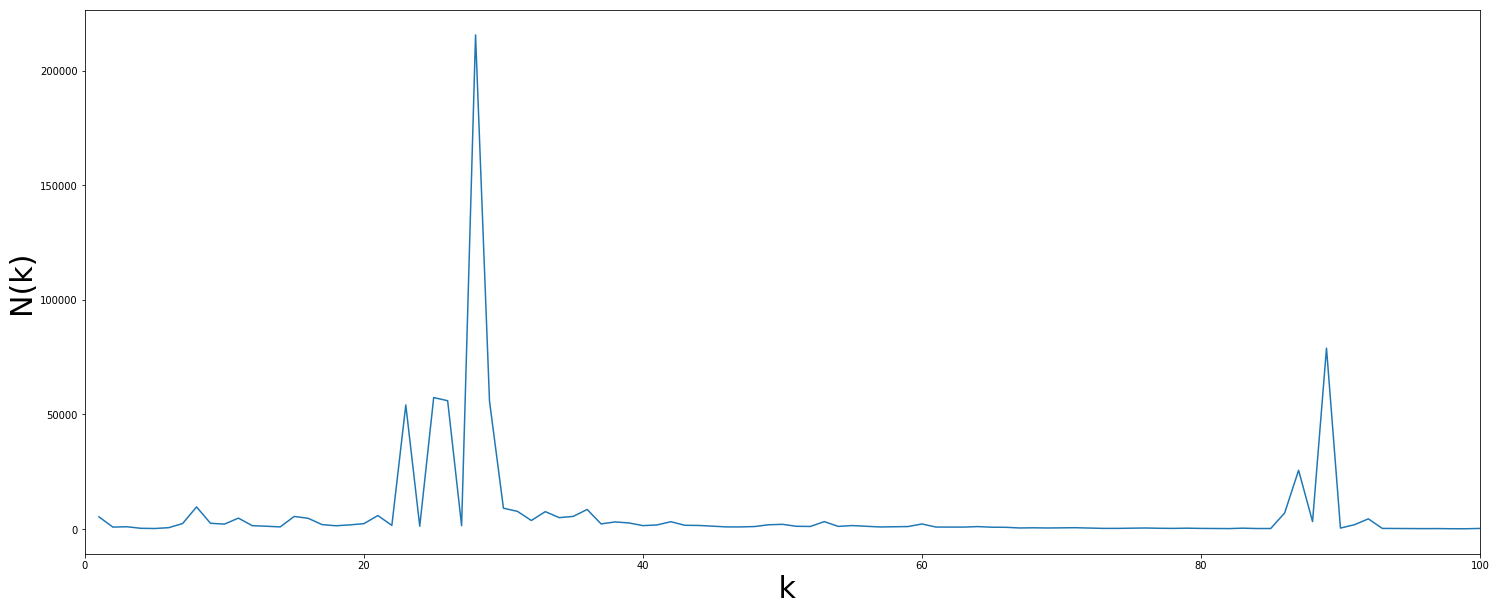

In [15]:
import matplotlib.pylab as plt
lists_out = sorted(outdegree_distribution.items()) # sorted by key, return a list of tuples
#%pylab inline
#pylab.rcParams['figure.figsize'] = (25, 10)
#plt.ylim(0, 10000)
plt.xlim(0, 100)
pylab.ylabel('N(k)', fontsize=30)
pylab.xlabel(' k', fontsize=30)

x_out, y_out = zip(*lists_out) # unpack a list of pairs into two tuples
plt.plot(x_out, y_out)
plt.show()

In [16]:
#POWER LAW
import matplotlib.pylab as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (25, 10)
lists = sorted(degree_distribution.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
#plt.ylim(1, 15)
# plt.xlim(0, 1000)
pylab.ylabel(' log(N(k))', fontsize=30)
pylab.xlabel('log(k)', fontsize=30)


plt.plot(log(x), log(y))
plt.show()

Populating the interactive namespace from numpy and matplotlib


/Users/nabeel/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


NameError: name 'degree_distribution' is not defined

In [17]:
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (25, 10)
lists = sorted(degree_distribution.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
#plt.ylim(1, 15)
# plt.xlim(0, 1000)
pylab.ylabel(' log(N(k))', fontsize=30)
pylab.xlabel('log(k)', fontsize=30)

matplotlib.pyplot.scatter(log(x),log(y))
matplotlib.pyplot.show()
# plt.plot(log(x), log(y))
# plt.show()

Populating the interactive namespace from numpy and matplotlib


NameError: name 'degree_distribution' is not defined

Populating the interactive namespace from numpy and matplotlib


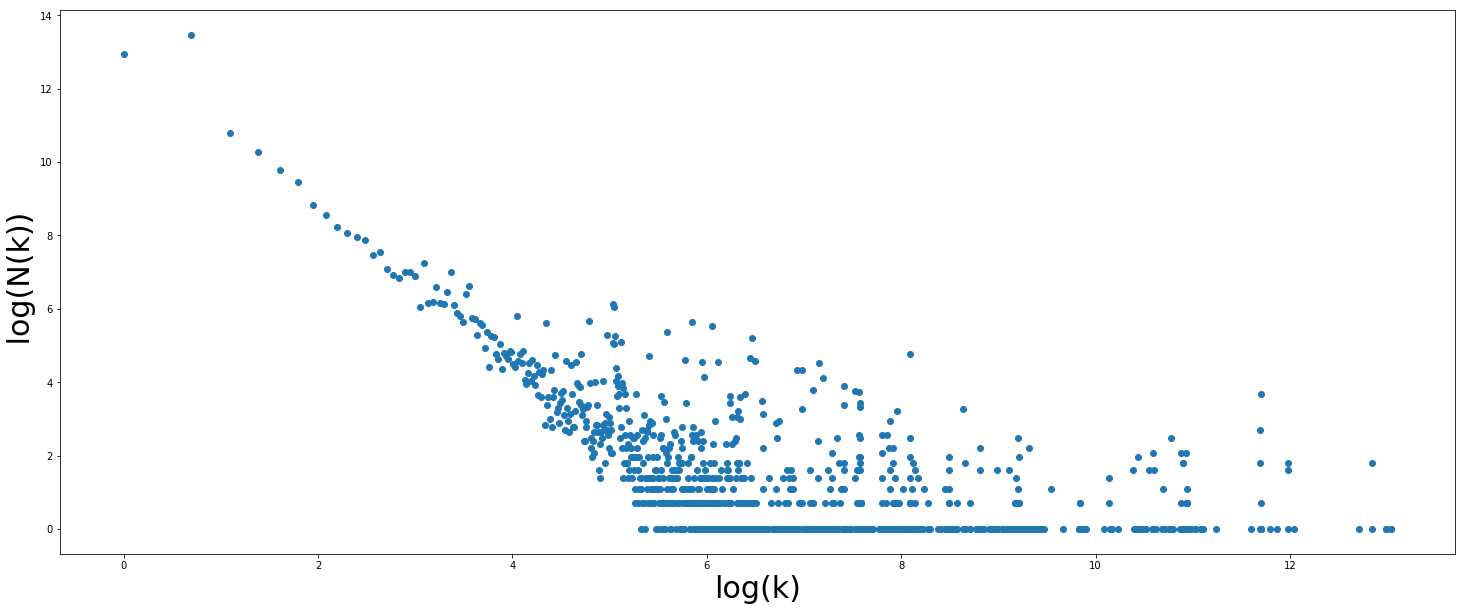

In [18]:
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (25, 10)
lists = sorted(indegree_distribution.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
#plt.ylim(1, 15)
# plt.xlim(0, 1000)
pylab.ylabel(' log(N(k))', fontsize=30)
pylab.xlabel('log(k)', fontsize=30)

matplotlib.pyplot.scatter(log(x),log(y))
matplotlib.pyplot.show()

In [19]:
a1=sorted(a,reverse=True)
for i in range(0,100):
    p = a1[i]
    for p1 in d:
        if d[p1]==p:
            print(p1,p)

NameError: name 'a' is not defined

In [20]:
len(a1)
pl=0
for i in range(292000,len(a1)):
    pl+=a1[i]
pl
#first 20 percent of nodes have sum- 48775242 
#remaining 80 percent have sum- 13042702

NameError: name 'a1' is not defined

In [ ]:
#d =degree , a for values 
#od = outdegree, out_degree for values  
#ind = indegree, in_degree for vales 
in_degree=sorted(in_degree,reverse=True)
for i in range(0,100):
    p = in_degree[i]
    for p1 in ind:
        if ind[p1]==p:
            print(p1,p)

('http://www.uiowa.edu/homepage/online-privacy-information', 461164)
('http://opsmanual.uiowa.edu/community-policies/nondiscrimination-statement', 458060)
('https://www.usnews.com/best-graduate-schools/top-medical-schools/university-of-iowa-carver-04036', 434911)
('http://www.forbes.com/companies/university-of-iowa-hospitals-clinics/', 434910)
('https://medicine.uiowa.edu', 378447)
('http://www.medicine.uiowa.edu/patient-care', 378446)
('http://www.medicine.uiowa.edu/about-us', 378446)
('http://www.medicine.uiowa.edu/news', 378446)
('http://www.medicine.uiowa.edu/education', 378446)
('http://www.medicine.uiowa.edu/research', 378446)
('http://www.medicine.uiowa.edu/about-us/departments', 378446)
('http://www.medicine.uiowa.edu/patient-care', 378446)
('http://www.medicine.uiowa.edu/about-us', 378446)
('http://www.medicine.uiowa.edu/news', 378446)
('http://www.medicine.uiowa.edu/education', 378446)
('http://www.medicine.uiowa.edu/research', 378446)
('http://www.medicine.uiowa.edu/about-us

('https://www.public-health.uiowa.edu/prc/active-ottumwa/', 120703)
('https://www.public-health.uiowa.edu/prc/core-research-projects/', 120703)
('https://www.public-health.uiowa.edu/prc/current/', 120703)
('https://www.public-health.uiowa.edu/prc/ottumwa-health-survey-results/', 120703)
('https://www.public-health.uiowa.edu/prc/iab/', 120703)
('https://www.public-health.uiowa.edu/prc/tools-and-resources/', 120703)
('https://www.public-health.uiowa.edu/prc/prc-30th-anniversary/', 120703)
('https://www.public-health.uiowa.edu/prc/timeline/', 120703)
('https://www.public-health.uiowa.edu/prc/active-ottumwa-fact-sheets/', 120703)
('https://www.public-health.uiowa.edu/prc/community-advisory-board/', 120703)
('https://www.public-health.uiowa.edu/prc/about/', 120703)
('https://www.public-health.uiowa.edu/prc/active-ottumwa-faqs/', 120703)
('https://www.public-health.uiowa.edu/prc/training-links/', 120703)
('https://www.public-health.uiowa.edu/prc/wp-content/uploads/2017/01/AdaptationPlanningT

('https://www.public-health.uiowa.edu/prc/current/', 120703)
('https://www.public-health.uiowa.edu/prc/ottumwa-health-survey-results/', 120703)
('https://www.public-health.uiowa.edu/prc/iab/', 120703)
('https://www.public-health.uiowa.edu/prc/tools-and-resources/', 120703)
('https://www.public-health.uiowa.edu/prc/prc-30th-anniversary/', 120703)
('https://www.public-health.uiowa.edu/prc/timeline/', 120703)
('https://www.public-health.uiowa.edu/prc/active-ottumwa-fact-sheets/', 120703)
('https://www.public-health.uiowa.edu/prc/community-advisory-board/', 120703)
('https://www.public-health.uiowa.edu/prc/about/', 120703)
('https://www.public-health.uiowa.edu/prc/active-ottumwa-faqs/', 120703)
('https://www.public-health.uiowa.edu/prc/training-links/', 120703)
('https://www.public-health.uiowa.edu/prc/wp-content/uploads/2017/01/AdaptationPlanningToolExample.pdf', 120703)
('https://www.public-health.uiowa.edu/prc/directions/', 120703)
('https://www.public-health.uiowa.edu/prc/organizationa

('https://www.public-health.uiowa.edu/prc/current/', 120703)
('https://www.public-health.uiowa.edu/prc/ottumwa-health-survey-results/', 120703)
('https://www.public-health.uiowa.edu/prc/iab/', 120703)
('https://www.public-health.uiowa.edu/prc/tools-and-resources/', 120703)
('https://www.public-health.uiowa.edu/prc/prc-30th-anniversary/', 120703)
('https://www.public-health.uiowa.edu/prc/timeline/', 120703)
('https://www.public-health.uiowa.edu/prc/active-ottumwa-fact-sheets/', 120703)
('https://www.public-health.uiowa.edu/prc/community-advisory-board/', 120703)
('https://www.public-health.uiowa.edu/prc/about/', 120703)
('https://www.public-health.uiowa.edu/prc/active-ottumwa-faqs/', 120703)
('https://www.public-health.uiowa.edu/prc/training-links/', 120703)
('https://www.public-health.uiowa.edu/prc/wp-content/uploads/2017/01/AdaptationPlanningToolExample.pdf', 120703)
('https://www.public-health.uiowa.edu/prc/directions/', 120703)
('https://www.public-health.uiowa.edu/prc/organizationa

('https://www.public-health.uiowa.edu/prc/current/', 120703)
('https://www.public-health.uiowa.edu/prc/ottumwa-health-survey-results/', 120703)
('https://www.public-health.uiowa.edu/prc/iab/', 120703)
('https://www.public-health.uiowa.edu/prc/tools-and-resources/', 120703)
('https://www.public-health.uiowa.edu/prc/prc-30th-anniversary/', 120703)
('https://www.public-health.uiowa.edu/prc/timeline/', 120703)
('https://www.public-health.uiowa.edu/prc/active-ottumwa-fact-sheets/', 120703)
('https://www.public-health.uiowa.edu/prc/community-advisory-board/', 120703)
('https://www.public-health.uiowa.edu/prc/about/', 120703)
('https://www.public-health.uiowa.edu/prc/active-ottumwa-faqs/', 120703)
('https://www.public-health.uiowa.edu/prc/training-links/', 120703)
('https://www.public-health.uiowa.edu/prc/wp-content/uploads/2017/01/AdaptationPlanningToolExample.pdf', 120703)
('https://www.public-health.uiowa.edu/prc/directions/', 120703)
('https://www.public-health.uiowa.edu/prc/organizationa

('https://www.public-health.uiowa.edu/prc/ui-collaborators/', 120703)
('https://www.public-health.uiowa.edu/prc/sab/', 120703)
('https://www.public-health.uiowa.edu/prc/ui-prc-logic-model/', 120703)
('https://www.public-health.uiowa.edu/prc/past/', 120703)
('https://www.public-health.uiowa.edu/prc/pilot-projects/', 120703)
('https://www.public-health.uiowa.edu/prc/former-student-profiles/', 120703)
('https://www.public-health.uiowa.edu/prc/mission/', 120703)
('https://www.public-health.uiowa.edu/prc/past-core-research-projects/', 120703)
('https://www.public-health.uiowa.edu/prc/active-ottumwa/', 120703)
('https://www.public-health.uiowa.edu/prc/core-research-projects/', 120703)
('https://www.public-health.uiowa.edu/prc/current/', 120703)
('https://www.public-health.uiowa.edu/prc/ottumwa-health-survey-results/', 120703)
('https://www.public-health.uiowa.edu/prc/iab/', 120703)
('https://www.public-health.uiowa.edu/prc/tools-and-resources/', 120703)
('https://www.public-health.uiowa.edu/

('https://www.public-health.uiowa.edu/prc/center-media/', 120703)
('https://www.public-health.uiowa.edu/prc/active-ottumwa-fact-sheets-espanol/', 120703)
('https://www.public-health.uiowa.edu/prc/publications-technical-reports/', 120703)
('https://www.public-health.uiowa.edu/prc/ui-collaborators/', 120703)
('https://www.public-health.uiowa.edu/prc/sab/', 120703)
('https://www.public-health.uiowa.edu/prc/ui-prc-logic-model/', 120703)
('https://www.public-health.uiowa.edu/prc/past/', 120703)
('https://www.public-health.uiowa.edu/prc/pilot-projects/', 120703)
('https://www.public-health.uiowa.edu/prc/former-student-profiles/', 120703)
('https://www.public-health.uiowa.edu/prc/mission/', 120703)
('https://www.public-health.uiowa.edu/prc/past-core-research-projects/', 120703)
('https://www.public-health.uiowa.edu/prc/active-ottumwa/', 120703)
('https://www.public-health.uiowa.edu/prc/core-research-projects/', 120703)
('https://www.public-health.uiowa.edu/prc/current/', 120703)
('https://www

('https://www.public-health.uiowa.edu/prc/center-media/', 120703)
('https://www.public-health.uiowa.edu/prc/active-ottumwa-fact-sheets-espanol/', 120703)
('https://www.public-health.uiowa.edu/prc/publications-technical-reports/', 120703)
('https://www.public-health.uiowa.edu/prc/ui-collaborators/', 120703)
('https://www.public-health.uiowa.edu/prc/sab/', 120703)
('https://www.public-health.uiowa.edu/prc/ui-prc-logic-model/', 120703)
('https://www.public-health.uiowa.edu/prc/past/', 120703)
('https://www.public-health.uiowa.edu/prc/pilot-projects/', 120703)
('https://www.public-health.uiowa.edu/prc/former-student-profiles/', 120703)
('https://www.public-health.uiowa.edu/prc/mission/', 120703)
('https://www.public-health.uiowa.edu/prc/past-core-research-projects/', 120703)
('https://www.public-health.uiowa.edu/prc/active-ottumwa/', 120703)
('https://www.public-health.uiowa.edu/prc/core-research-projects/', 120703)
('https://www.public-health.uiowa.edu/prc/current/', 120703)
('https://www

('https://www.public-health.uiowa.edu/prc/presentations/', 120703)
('https://www.public-health.uiowa.edu/prc/wp-content/uploads/2017/01/EBI-Webinar-Slides.pdf', 120703)
('https://www.public-health.uiowa.edu/prc/center-media/', 120703)
('https://www.public-health.uiowa.edu/prc/active-ottumwa-fact-sheets-espanol/', 120703)
('https://www.public-health.uiowa.edu/prc/publications-technical-reports/', 120703)
('https://www.public-health.uiowa.edu/prc/ui-collaborators/', 120703)
('https://www.public-health.uiowa.edu/prc/sab/', 120703)
('https://www.public-health.uiowa.edu/prc/ui-prc-logic-model/', 120703)
('https://www.public-health.uiowa.edu/prc/past/', 120703)
('https://www.public-health.uiowa.edu/prc/pilot-projects/', 120703)
('https://www.public-health.uiowa.edu/prc/former-student-profiles/', 120703)
('https://www.public-health.uiowa.edu/prc/mission/', 120703)
('https://www.public-health.uiowa.edu/prc/past-core-research-projects/', 120703)
('https://www.public-health.uiowa.edu/prc/active-

In [ ]:
out_degree=sorted(out_degree,reverse=True)
for i in range(0,100):
    p = out_degree[i]
    for p1 in od:
        if od[p1]==p:
            print(p1,p)
# pages with highest out degree are domain of ir.uiowa.edu
#and some pages which have events

('https://ir.uiowa.edu/authors.html', 23868)
('http://ir.uiowa.edu/authors.html', 23868)
('https://ir.uiowa.edu/authors.html', 23868)
('http://ir.uiowa.edu/authors.html', 23868)
('http://ir.uiowa.edu/2009.html', 4000)
('https://ir.uiowa.edu/2009.html', 4000)
('http://ir.uiowa.edu/2009.html', 4000)
('https://ir.uiowa.edu/2009.html', 4000)
('http://ir.uiowa.edu/2015.6.html', 3987)
('https://ir.uiowa.edu/2017.html', 3986)
('http://ir.uiowa.edu/2015.4.html', 3973)
('http://ir.uiowa.edu/2015.3.html', 3971)
('https://ir.uiowa.edu/2015.html', 3953)
('http://ir.uiowa.edu/2015.html', 3953)
('https://ir.uiowa.edu/2015.html', 3953)
('http://ir.uiowa.edu/2015.html', 3953)
('http://ir.uiowa.edu/2015.5.html', 3902)
('http://ir.uiowa.edu/2012.html', 3831)
('https://ir.uiowa.edu/2012.html', 3831)
('http://ir.uiowa.edu/2012.html', 3831)
('https://ir.uiowa.edu/2012.html', 3831)
('http://ir.uiowa.edu/2014.3.html', 3751)
('https://ir.uiowa.edu/2010.html', 3731)
('http://ir.uiowa.edu/2010.html', 3731)
('ht

('https://uiowa.edu/facultysenate/facultysenate/facultysenate/meetings/meeting-archive', 547)
('https://uiowa.edu/facultysenate/meetings/meeting-archive', 547)
('https://uiowa.edu/facultysenate/facultysenate/meetings/meeting-archive', 547)
('https://uiowa.edu/facultysenate/facultysenate/facultysenate/meetings/meeting-archive', 547)
('https://uiowa.edu/facultysenate/meetings/meeting-archive', 547)
('https://uiowa.edu/facultysenate/facultysenate/meetings/meeting-archive', 547)
('http://catalog.registrar.uiowa.edu/liberal-arts-sciences/health-human-physiology/sport-recreation-management-bs/', 545)
('https://blog.lib.uiowa.edu/hardinmd/page/13/', 544)
('https://blog.lib.uiowa.edu/hardinmd/category/uncategorized/page/13/', 544)
('http://catalog.registrar.uiowa.edu/courses/rels/', 544)
('https://blog.lib.uiowa.edu/hardinmd/author/rumsey/page/13/', 544)
('https://blog.lib.uiowa.edu/hardinmd/page/13/', 544)
('https://blog.lib.uiowa.edu/hardinmd/category/uncategorized/page/13/', 544)
('http://c